In [1]:
import pandas as pd

#reading the dataset
df = pd.read_csv("dataset_0HB-1AI.csv")
df.head()

,Unnamed: 0,sentence,class
0,0,NLP is a multidisciplinary field that draws fr...,0
1,1,"In terms of linguistics, a program must be abl...",0
2,2,Of course each language has its own forms of a...,0
3,3,Programs can use several strategies for dealin...,0
4,4,As formidable as the task of extracting the co...,0


In [2]:
# The class column represents the classification of the text in our dataset as Human (0) of AI (1)

df.shape

(7344, 3)

In [3]:
# To check for class imbalance

df['class'].value_counts()

class
1    4008
0    3336
Name: count, dtype: int64

In [4]:
df['label'] = df['class'].map({0 : "Human", 1 : "AI"})
df.head()

,Unnamed: 0,sentence,class,label
0,0,NLP is a multidisciplinary field that draws fr...,0,Human
1,1,"In terms of linguistics, a program must be abl...",0,Human
2,2,Of course each language has its own forms of a...,0,Human
3,3,Programs can use several strategies for dealin...,0,Human
4,4,As formidable as the task of extracting the co...,0,Human


In [5]:
# Converting sentence (text column) in to word vectors
import spacy
nlp = spacy.load("en_core_web_lg")

In [6]:
df['vector'] = df['sentence'].apply(lambda x: nlp(x).vector)
df.head()

,Unnamed: 0,sentence,class,label,vector
0,0,NLP is a multidisciplinary field that draws fr...,0,Human,"[-1.5092337, -0.1936465, -0.3881989, -0.545883..."
1,1,"In terms of linguistics, a program must be abl...",0,Human,"[-1.6096503, 1.0357584, -0.44561067, -0.111713..."
2,2,Of course each language has its own forms of a...,0,Human,"[-2.0689058, -0.6548883, -1.2195809, 0.2336663..."
3,3,Programs can use several strategies for dealin...,0,Human,"[-2.2618732, 0.47811788, -1.0672407, 0.8176014..."
4,4,As formidable as the task of extracting the co...,0,Human,"[-2.0082736, -0.81104, 0.058229446, 0.29187, 4..."


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['vector'].tolist(),
    df['class'],
    test_size=0.2,
    random_state=2022
)

KNeighborsClassifier
****Results****
Accuracy: 75.3574%
Log Loss: 3.0957610811935967
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       658
           1       0.77      0.80      0.78       811

    accuracy                           0.75      1469
   macro avg       0.75      0.75      0.75      1469
weighted avg       0.75      0.75      0.75      1469

Confusion Matrix:


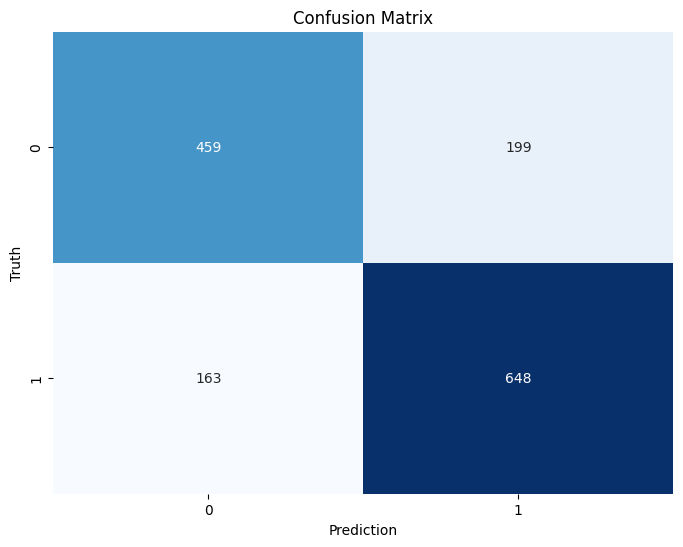

SVC
****Results****
Accuracy: 73.1110%
Log Loss: 0.5237865122026223
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.53      0.64       658
           1       0.70      0.89      0.79       811

    accuracy                           0.73      1469
   macro avg       0.75      0.71      0.71      1469
weighted avg       0.75      0.73      0.72      1469

Confusion Matrix:


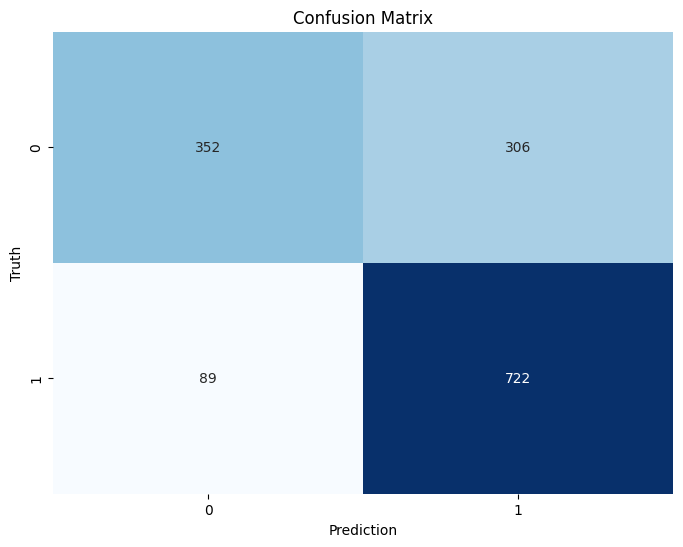

NuSVC
****Results****
Accuracy: 82.3009%
Log Loss: 0.39278366400169384
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       658
           1       0.81      0.88      0.85       811

    accuracy                           0.82      1469
   macro avg       0.82      0.82      0.82      1469
weighted avg       0.82      0.82      0.82      1469

Confusion Matrix:


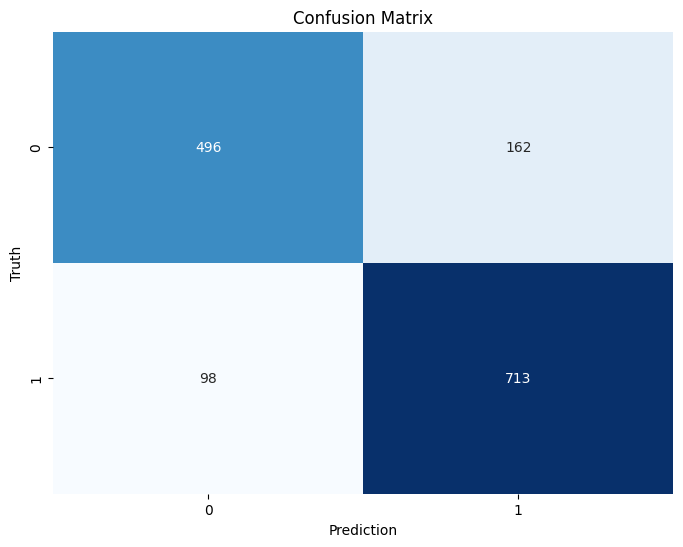

DecisionTreeClassifier
****Results****
Accuracy: 67.3247%
Log Loss: 11.730654905310278
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63       658
           1       0.70      0.71      0.71       811

    accuracy                           0.67      1469
   macro avg       0.67      0.67      0.67      1469
weighted avg       0.67      0.67      0.67      1469

Confusion Matrix:


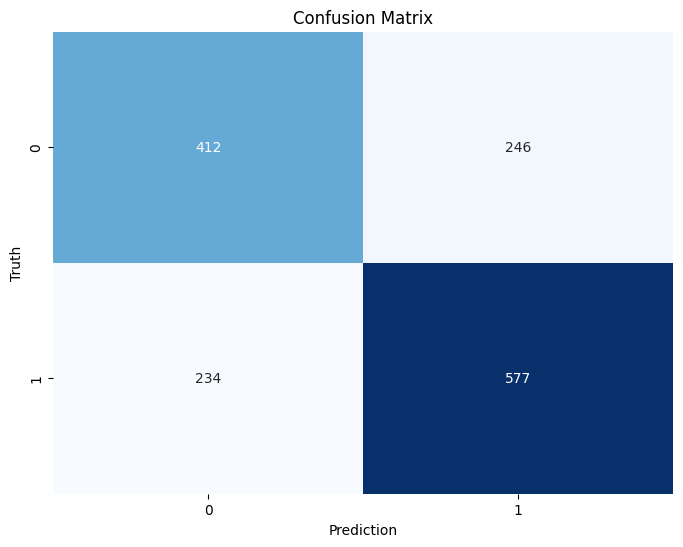

RandomForestClassifier
****Results****
Accuracy: 75.3574%
Log Loss: 0.525217197109085
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       658
           1       0.76      0.82      0.79       811

    accuracy                           0.75      1469
   macro avg       0.75      0.75      0.75      1469
weighted avg       0.75      0.75      0.75      1469

Confusion Matrix:


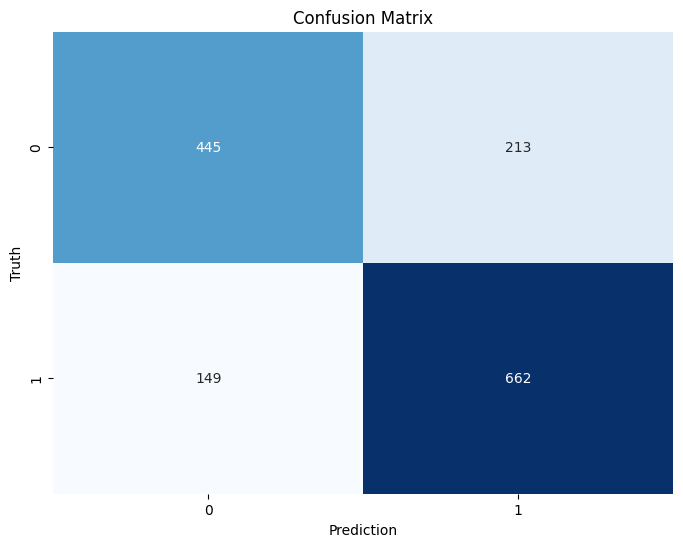

AdaBoostClassifier
****Results****
Accuracy: 75.9700%
Log Loss: 0.6803952890752859
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       658
           1       0.78      0.79      0.78       811

    accuracy                           0.76      1469
   macro avg       0.76      0.76      0.76      1469
weighted avg       0.76      0.76      0.76      1469

Confusion Matrix:


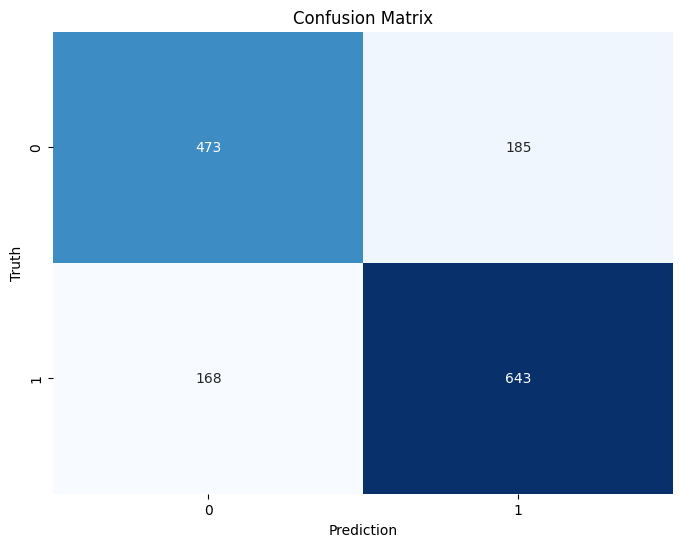

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import pyplot as plt
import seaborn as sn

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

log_cols = ["Classifier", "Accuracy", "Log Loss"]
log_entries = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("=" * 30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions_proba = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions_proba)
    print("Log Loss: {}".format(ll))

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, train_predictions))

    # Confusion Matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, train_predictions)
    
    plt.figure(figsize=(8, 6))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.title('Confusion Matrix')
    plt.show()

    log_entries.append([name, acc * 100, ll])

print("=" * 30)

log = pd.DataFrame(log_entries, columns=log_cols)


In [ ]:
sn.set_color_codes("muted")
sn.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.xlim(50, 100)
plt.show()

sn.set_color_codes("muted")
sn.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()